In [1]:
import numpy as np
import keras as kr

Using TensorFlow backend.


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


In [4]:
#Loads model based on Image Super-Resolution Using Deep Convolutional Networks by Dong et al
def DongCNN(in_shape):
    model = Sequential()
    
    model.add(Conv2D(64, (9, 9), padding='same', input_shape=in_shape))
    model.add(Activation("relu"))
    model.add(Conv2D(32, (5, 5), padding='same'))
    model.add(Activation("relu"))
    model.add(Conv2D(1, (5,5), padding='same'))
    
    return model
    

In [42]:
#Carrega Dados
from sklearn.model_selection import train_test_split
dataset = np.load("dataset.npy")
X = dataset[:,1,:,:]
Y = dataset[:,0,:,:]
X = X.reshape(X.shape + (1,))
Y = Y.reshape(Y.shape + (1,))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)

In [43]:
model = DongCNN(X_train[0].shape)
opt = Adam()
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy', 'mean_squared_error'])

In [44]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

Train on 249354 samples, validate on 62339 samples
Epoch 1/5
249354/249354 [==============================] - 460s 2ms/step - loss: 336.9820 - acc: 0.0563 - mean_squared_error: 336.9820 - val_loss: 257.5157 - val_acc: 0.0702 - val_mean_squared_error: 257.5157
Epoch 2/5
249354/249354 [==============================] - 246s 986us/step - loss: 256.6143 - acc: 0.0743 - mean_squared_error: 256.6143 - val_loss: 245.9053 - val_acc: 0.1075 - val_mean_squared_error: 245.9053
Epoch 3/5
249354/249354 [==============================] - 251s 1ms/step - loss: 241.8349 - acc: 0.0788 - mean_squared_error: 241.8349 - val_loss: 236.2392 - val_acc: 0.1334 - val_mean_squared_error: 236.2392
Epoch 4/5
249354/249354 [==============================] - 242s 972us/step - loss: 236.1625 - acc: 0.0813 - mean_squared_error: 236.1625 - val_loss: 223.0607 - val_acc: 0.1220 - val_mean_squared_error: 223.0607
Epoch 5/5
249354/249354 [==============================] - 246s 985us/step - loss: 256.8370 - acc: 0.0761 - m

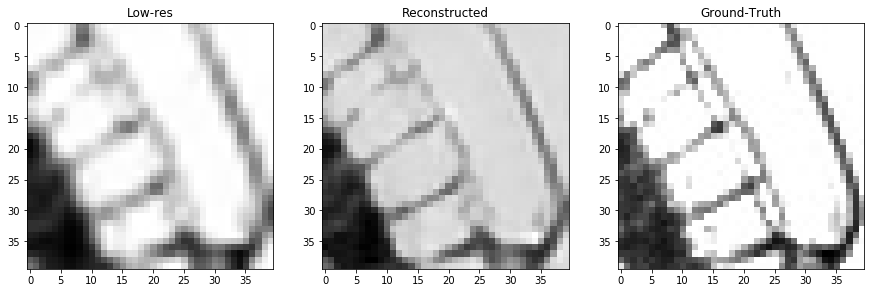

In [68]:
import matplotlib.pyplot as plt

ex = 9
patch = X_test[ex]
truth = y_test[ex]
preds = model.predict(patch.reshape((1,) + patch.shape))[0]

patch = patch.reshape(patch.shape[0:2])
truth = truth.reshape(truth.shape[0:2])
preds = preds.reshape(preds.shape[0:2])

fig = plt.figure(figsize=(15,15))
fig.add_subplot("131")
plt.title("Low-res")
plt.imshow(patch, cmap='gray')

fig.add_subplot("132")
plt.title("Reconstructed")
plt.imshow(preds, cmap='gray')

fig.add_subplot("133")
plt.title("Ground-Truth")
plt.imshow(truth, cmap='gray')